In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy


from scipy import stats
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from joblib import dump


# Data Exploration

In [12]:
df = pd.read_csv('data/loan_data_set.csv')

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df.Loan_ID.value_counts(dropna=False)
print(df.shape)

(614, 13)


**Note:** 614 unique observations are available in this dataframe.

#### GENDER DEMOGRAPHICS

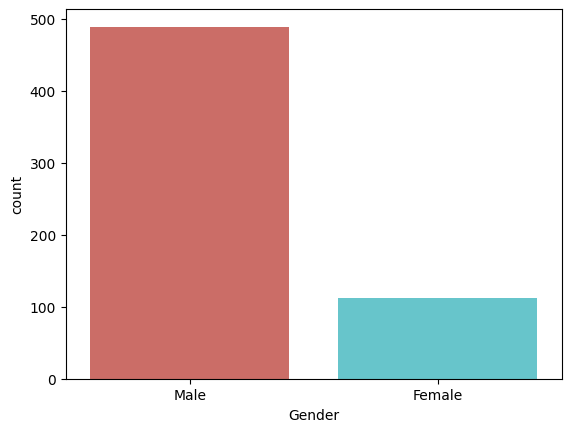

In [15]:
sns.countplot(x="Gender", data=df, hue="Gender", palette="hls")
plt.legend().set_visible(False)
plt.show()

In [16]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


#### Marriage Demographics

In [17]:
df.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

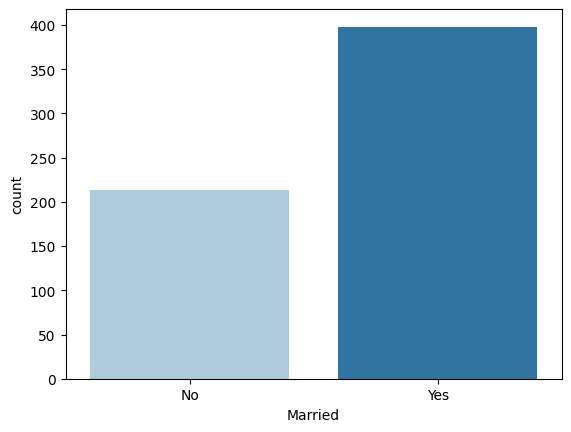

In [18]:
sns.countplot(x="Married", data=df, hue="Married", palette="Paired")
plt.legend().set_visible(False)
plt.show()

In [19]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


#### Credit History

In [20]:
df.Credit_History.value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

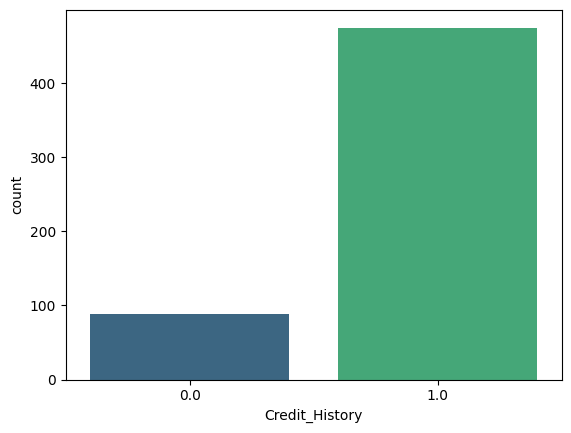

In [21]:
sns.countplot(x="Credit_History", data=df, hue="Credit_History", palette="viridis")
plt.legend().set_visible(False)
plt.show()

In [22]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


### Loan Status

In [23]:
df.Loan_Status.value_counts(dropna=False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

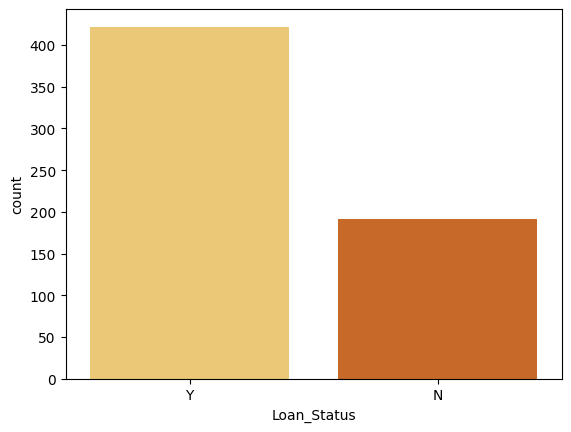

In [24]:
sns.countplot(x="Loan_Status", data=df, hue="Loan_Status", palette="YlOrBr")
plt.show()

In [25]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


#### Loan Amount Term

In [26]:
df.Loan_Amount_Term.value_counts(dropna=False)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

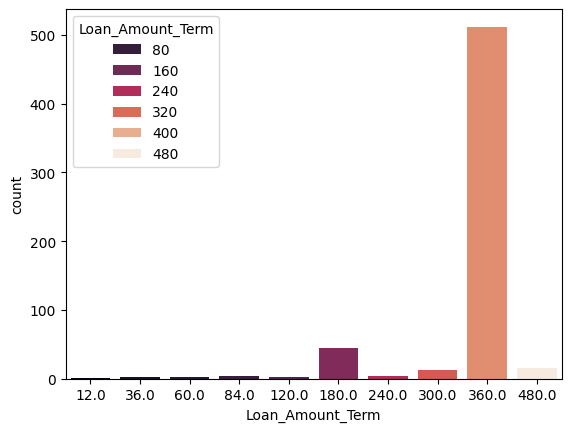

In [27]:
sns.countplot(x="Loan_Amount_Term", data=df, hue='Loan_Amount_Term', palette="rocket")
plt.show()

In [28]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


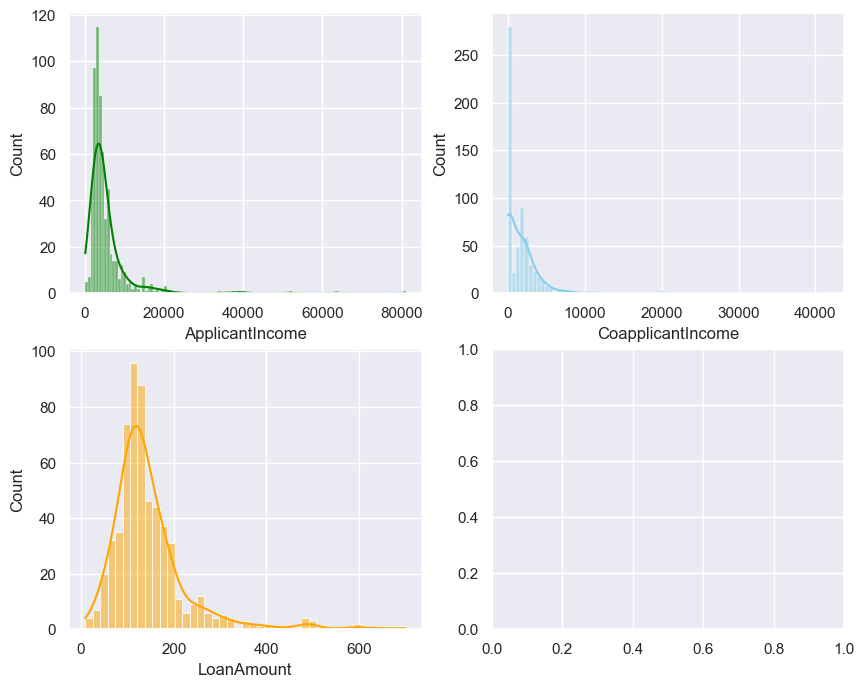

In [29]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

# Data Preprocessing

In [30]:
df = df.drop(['Loan_ID'], axis = 1)

In [31]:
# Replaces missing Categorical values with an estimated value using mode().
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [32]:
# Replaces missing numerical value with an estimated value using mean().
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [33]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [34]:
df
df.dtypes


ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender                        bool
Married                       bool
Dependents_0                  bool
Dependents_1                  bool
Dependents_2                  bool
Dependents_3+                 bool
Education                     bool
Self_Employed                 bool
Property_Area_Rural           bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
Loan_Status                   bool
dtype: object

In [35]:
# Filters out the outliers based on the interquartile range (IQR).
Q1 = np.percentile(df, 25, axis=0)
Q3 = np.percentile(df, 75, axis=0)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

#### Skewed Distribution Treatment
In data exploration section, it already shown that distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed.
I will use square root transformation to normalized the distribution.

In [36]:
# Square Root Transformation with dtype casting using loc
df.loc[:, 'ApplicantIncome'] = df['ApplicantIncome'].apply(lambda x: np.sqrt(x).astype(float))
df.loc[:, 'CoapplicantIncome'] = df['CoapplicantIncome'].apply(lambda x: np.sqrt(x).astype(float))
df.loc[:, 'LoanAmount'] = df['LoanAmount'].apply(lambda x: np.sqrt(x).astype(float))

/var/folders/vh/21k12_zd3094ffrq027spfyc0000gp/T/ipykernel_28601/1281236818.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[76.47875522 77.45966692 43.0464865  70.3562364  50.99019514 52.90557627
 56.27610505 59.16079783 47.69696007 60.         42.42640687 48.98979486
 62.77738446 76.29547824 46.17358552 58.01723882 50.         75.67033765
 56.63920903 61.23724357 48.64154603 50.         92.5526877  75.46522378
 54.38749856 64.28841264 82.35289916 44.46346815 41.94043395 69.59166617
 68.20557162 61.77378085 72.91090453 71.06335202 74.61903242 75.27947928
 62.16912417 77.97435476 44.87761134 52.13444159 69.9642766  73.60027174
 51.94227565 69.71370023 95.73922916 57.04384279 54.58937626 67.69785816
 60.88513776 49.3862329  75.55130707 59.13543777 43.77213726 48.81598099
 62.11280061 64.73793324 91.28526716 49.78955714 58.46366393 56.32938842
 12.24744871 61.04916052 54.5068803  87.05170877 79.0569415  57.008771

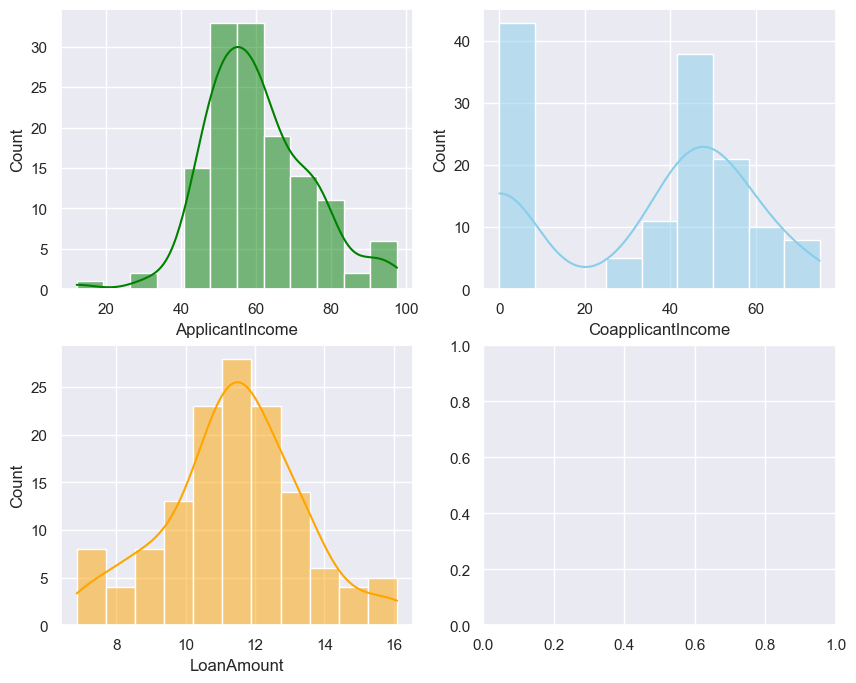

In [37]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

As can be seen, the distribution after using log transformation are much better compared to original distribution.

##### Feature Seperating and SMOTE for imbalanced Loan Status counts.

In [38]:
# Feature Separating
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

# Value counts for y (Loan_Status)
print("Value counts for y:")
print(y.value_counts())


Value counts for y:
Loan_Status
True     112
False     24
Name: count, dtype: int64


In [39]:
X, y = SMOTE().fit_resample(X, y)

/var/folders/vh/21k12_zd3094ffrq027spfyc0000gp/T/ipykernel_28601/1604303567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, palette="coolwarm")


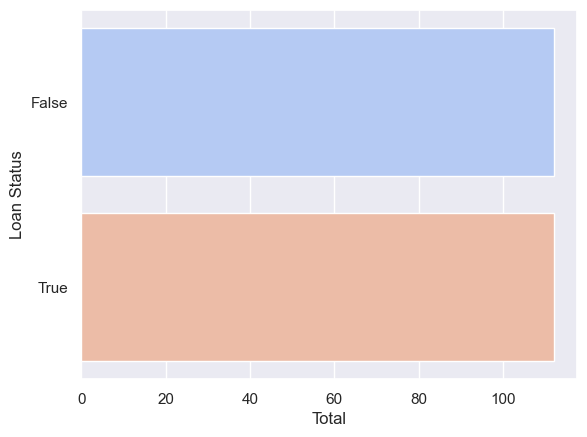

In [40]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply MinMaxScaler to the training set
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [42]:
# Save the fitted scaler to a file
dump(scaler, 'scaler.joblib')

['scaler.joblib']

# Models (Ascending accuracy)

### Logistic Regression

In [43]:
# Train the logistic regression classifier
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train_scaled, y_train)

# Apply the same scaling to the test set
X_test_scaled = scaler.transform(X_test)

# Predict on the scaled test set
y_pred = LRclassifier.predict(X_test_scaled)

# Print classification report and confusion matrix for the test set
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print the accuracy for the test set
LRAcc = accuracy_score(y_test, y_pred)
print('LR accuracy on the test set: {:.2f}%'.format(LRAcc * 100))

              precision    recall  f1-score   support

       False       0.86      0.52      0.65        23
        True       0.65      0.91      0.75        22

    accuracy                           0.71        45
   macro avg       0.75      0.72      0.70        45
weighted avg       0.75      0.71      0.70        45

[[12 11]
 [ 2 20]]
LR accuracy on the test set: 71.11%


### Random Forest

In [44]:
# Train the Random Forest classifier
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1)
RFclassifier.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred_rf = RFclassifier.predict(X_test_scaled)

# Print classification report and confusion matrix for the test set
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# Calculate and print the accuracy for the test set
RFAcc = accuracy_score(y_test, y_pred_rf)
print('Random Forest accuracy on the test set: {:.2f}%'.format(RFAcc * 100))

              precision    recall  f1-score   support

       False       0.83      0.83      0.83        23
        True       0.82      0.82      0.82        22

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.82      0.82      0.82        45

[[19  4]
 [ 4 18]]
Random Forest accuracy on the test set: 82.22%


In [45]:
dump(RFclassifier, 'random_forest_model.joblib')

['random_forest_model.joblib']

### K-Nearest Neighbour (KNN)

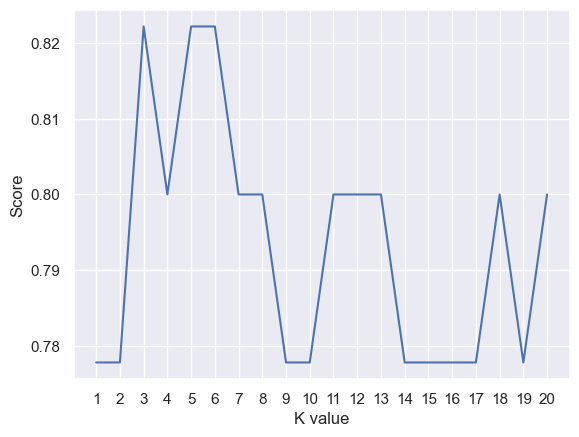

KNN best accuracy: 82.22%


In [46]:
# Ensure the data is in a C-contiguous array format
X_train_contiguous = np.ascontiguousarray(X_train_scaled)
X_test_contiguous = np.ascontiguousarray(X_test_scaled)

scoreListknn = []
for i in range(1, 21):
    KNclassifier = KNeighborsClassifier(n_neighbors=i)
    KNclassifier.fit(X_train_contiguous, y_train)
    scoreListknn.append(KNclassifier.score(X_test_contiguous, y_test))

plt.plot(range(1, 21), scoreListknn)
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc * 100))

In [47]:
optimal_k = scoreListknn.index(max(scoreListknn)) + 1  # Adding 1 because index 0 corresponds to k=1

# Train the KNN classifier with the optimal number of neighbors
KNclassifier_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
KNclassifier_optimal.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred_knn = KNclassifier_optimal.predict(X_test_scaled)

# Print classification report and confusion matrix for the test set
print("Classification Report for KNN with k =", optimal_k)
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Calculate and print the accuracy for the test set
KNAcc_optimal = accuracy_score(y_test, y_pred_knn)
print('KNN accuracy on the test set with k = {}: {:.2f}%'.format(optimal_k, KNAcc_optimal * 100))

Classification Report for KNN with k = 3
              precision    recall  f1-score   support

       False       0.78      0.91      0.84        23
        True       0.89      0.73      0.80        22

    accuracy                           0.82        45
   macro avg       0.83      0.82      0.82        45
weighted avg       0.83      0.82      0.82        45

Confusion Matrix:
[[21  2]
 [ 6 16]]
KNN accuracy on the test set with k = 3: 82.22%


### Gaussian NB

In [48]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       False       0.68      0.74      0.71        23
        True       0.70      0.64      0.67        22

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.69      0.69      0.69        45

[[17  6]
 [ 8 14]]
Gaussian Naive Bayes accuracy: 68.89%


### Decision Tree

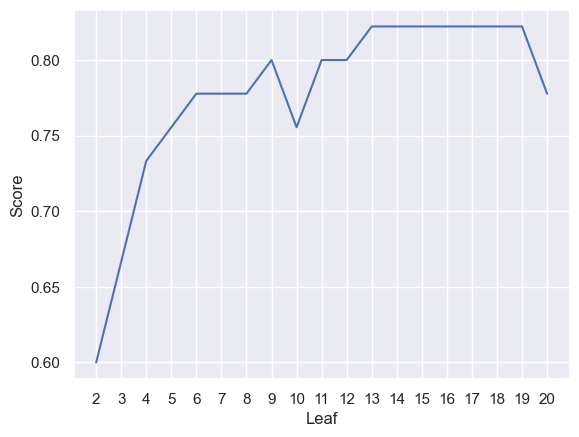

Decision Tree Accuracy: 82.22%


In [49]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

## Model Comparison

In [50]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'Gaussian NB',
                                  'Decision Tree', 'Random Forest'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, NBAcc2*100, 
                                    DTAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,K Neighbors,82.222222
3,Decision Tree,82.222222
4,Random Forest,82.222222
0,Logistic Regression,71.111111
2,Gaussian NB,68.888889


In [51]:
avgAccuracy= pd.read_csv('data/ModelAccuracyAvg.csv')
avgAccuracy

,Model,Run #1,Run #2,Run #3,Run #3.1,Run #4,Run #5,Run #6,Run #7,Run #8,Run #9,Run #10,Average Score
0,K Neighbors,86.666667,84.444444,86.666667,84.444444,86.666667,86.666667,84.444444,86.666667,82.222222,88.888889,84.444444,85.656566
1,Decision Tree,77.777778,80.000000,84.444444,82.222222,86.666667,80.000000,82.222222,82.222222,80.000000,86.666667,80.000000,82.020202
2,Random Forest,77.777778,80.000000,84.444444,75.555556,82.222222,75.555556,82.222222,77.777778,77.777778,82.222222,80.000000,79.595960
3,Logistic Regression,71.111111,77.777778,71.111111,73.333333,82.222222,75.555556,73.333333,75.555556,73.333333,80.000000,77.777778,75.555556
4,Gaussian NB,66.666667,66.666667,64.444444,68.888889,66.666667,64.444444,66.666667,68.888889,66.666667,71.111111,64.444444,66.868687
